# Talking Shop 2: Can we motivate more students to be more envionmentally conscious?

## Install Libraries
Install required python libraries (uncomment as needed)

In [1]:
# ! pip install ipython-sql # SQL magic function
# ! pip install pandas
# ! pip install sqlalchemy
# ! pip install pyhive[presto]
# ! pip install pyhive[hive]
# ! pip install ggplot

## Import Libraries
Import the libraries used throughout the rest of this notebook.

In [2]:
# import data analysis library
import pandas
# import numpy
import numpy
# import visualization library; plotting module
import matplotlib.pyplot as pyplot
# import visualization library;
import seaborn
# import a database toolkit library; query engine module
from sqlalchemy.engine import create_engine
# import scipy science toolkit; pearsonR correlation module
from scipy.stats.stats import pearsonr
# import Ipython display library; html display module
from IPython.display import display_html
# import Kmeans algorithm
from sklearn.cluster import KMeans
# import PCA algorithm
from sklearn.decomposition import PCA

## Create data connection
Next, establish a connection to autodaas data platform

In [3]:
# create a presto engine using the sqlalchemy create_engine 
engine = create_engine('presto://localhost:8080/hive')

### List and preview the datasets
Then, we review our datasets before beginning the analysis.
- create variables for reference throughout the notebook for each dataset
- convert the data tables into dataframes by querying each dataset using SQL.
- preview each dataset to look at the columns and data in each dataset.

#### place into variables and convert queries into dataframes

In [4]:
# place dataset names into variables
envtproject_campaignparticipants = 'adviews.campaign_participant'
envtproject_student = 'adviews.campaigns_envtproject_student'

# create sql statements
sql_envtproject_campaignparticipants = """select * from %s""" % (envtproject_campaignparticipants)
sql_envtproject_student = """select * from %s""" % (envtproject_student)

# query each dataset into a dataframe (python table structure) using pandas read_sql function
df_envtproject_campaignparticipants = pandas.read_sql(sql_envtproject_campaignparticipants, engine)
df_envtproject_student = pandas.read_sql(sql_envtproject_student, engine)

print sql_envtproject_campaignparticipants + '\n' +  sql_envtproject_student

select * from adviews.campaign_participant
select * from adviews.campaigns_envtproject_student


#### display dataset previews

In [5]:
# add a participation count (1 for each response - could be more in the future)
df_envtproject_campaignparticipants['n'] = 1
# display dataframe previews inline
df1 = df_envtproject_campaignparticipants.head(3) \
    .style.set_table_attributes("style='display:inline'").set_caption(envtproject_campaignparticipants)
df2 = df_envtproject_student.head(3) \
    .style.set_table_attributes("style='display:inline'").set_caption(envtproject_student)
display_html(
    df1._repr_html_()\
    +df2._repr_html_(), raw=True)

adviews.campaign_participant 
 
 
 campaign_id 
 campaign_descr 
 month_name 
 university_name 
 room_id 
 n 
 
 
 0 
 1 
 Electric 
 January 
 University One 
 100 
 1 
 
 1 
 1 
 Electric 
 January 
 University One 
 98 
 1 
 
 2 
 1 
 Electric 
 January 
 University One 
 88 
 1 
 
 
 adviews.campaigns_envtproject_student 
 
 
 student_email 
 room_id 
 
 
 0 
 sshowt0@hugedomains.com 
 1 
 
 1 
 sbirkby2s@who.int 
 1 
 
 2 
 vkeech1@noaa.gov 
 2

## Classify and Cluster the data

### Convert data into a matrix

In [6]:
# create a pivot table room_id vs campaign_id
matrix = df_envtproject_campaignparticipants.pivot_table(index=['room_id'], columns=['campaign_id'], values='n')
matrix.head(3)

campaign_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
room_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [7]:
# replace NaN with 0 for rooms and campaigns that we do not have data for (did not participate)
matrix = matrix.fillna(0).reset_index()
matrix.head(3)
x_cols = matrix.columns[1:]

### Cluster the data

#### Set two variables
- random state for use in algorithms (to allow for repeated results)
- number of clusters for the analysis

In [8]:
random_state = 9
num_groups = 3

#### Use Kmeans algorithm to cluster data in to 3 groups [0-2]

In [9]:
clusterMatrix = matrix
cluster = KMeans(n_clusters=num_groups, random_state=random_state)
clusterMatrix['cluster'] = cluster.fit_predict(clusterMatrix[clusterMatrix.columns[2:]])
clusterMatrix.head(10)

campaign_id,room_id,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


#### Review cluster counts

In [10]:
# counts of participants in each cluster [0-4]
clusterLabels = clusterMatrix.cluster.value_counts().rename_axis('clusters').reset_index(name='counts')
clusterLabels

,clusters,counts
0,2,49
1,1,35
2,0,16


#### Graph cluster counts

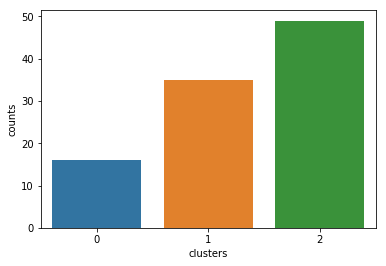

In [11]:
seaborn.barplot(x='clusters', y='counts', data=clusterLabels)

### Transform data for Visualization and Analysis

#### Reduce dimensionality and create X and Y coordinates

In [12]:
pca = PCA(n_components=2, random_state=random_state)

clusterMatrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
clusterMatrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
clusterMatrix = clusterMatrix.reset_index()

In [13]:
room_clusters = matrix[['room_id', 'cluster', 'x', 'y']]
room_clusters.head()

campaign_id,room_id,cluster,x,y
0,1,0,-0.300227,0.829765
1,2,0,-0.461726,1.313485
2,3,2,-0.151666,-0.587844
3,4,1,1.079827,-0.007488
4,5,1,0.281381,0.075254


#### Merge campaign participants and our room clusters to create a master analysis dataset

In [14]:
df = pandas.merge(df_envtproject_campaignparticipants, room_clusters)
df.head(3)

,campaign_id,campaign_descr,month_name,university_name,room_id,n,cluster,x,y
0,1,Electric,January,University One,100,1,2,-0.509137,-0.687321
1,2,Water,January,University One,100,1,2,-0.509137,-0.687321
2,11,Paper Recycling,May,University One,100,1,2,-0.509137,-0.687321


#### Graph the clusters to analyze the groups visually

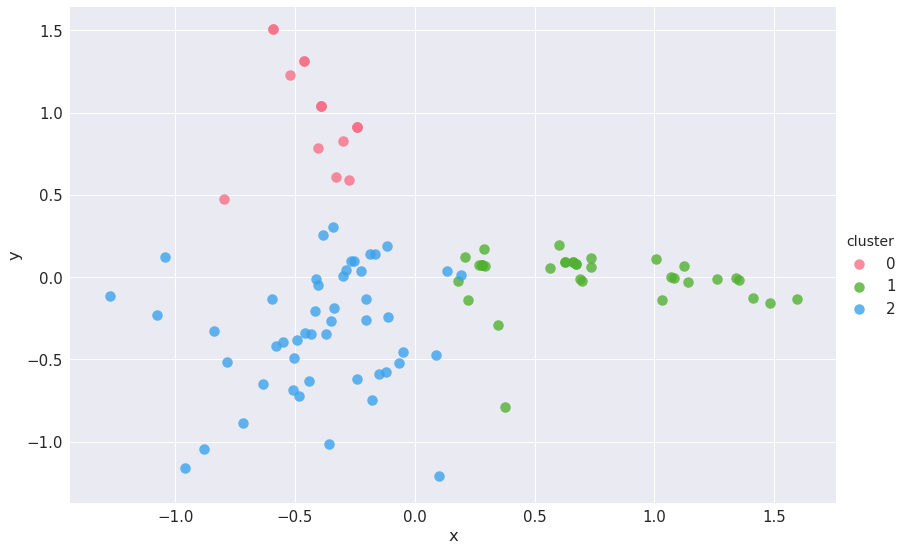

In [15]:
seaborn.set(font_scale=1.5)
seaborn.lmplot(x='x', y='y', data=room_clusters, \
               hue="cluster", palette='husl', fit_reg=False, \
               size=8, aspect=1.5, scatter_kws={"s": 110})

#### Finally, we can look at the data from one perspective: cluster-group vs participation
##### Here we can view our groups of similar participants and analyze the data through questions like:
- Which group did best at the Paper recycling campaign? <em>Group 2 with a participation of 8 dorm rooms</em>
- Which groups did poorly at Water conservation campaign?<em>Group 0 had no participation in our water campaigns</em>
- We group cares about the most campaigns? <em>Group 2 participated in 9 campaigns!</em>
- Which group can we target with an email on a campaign to increase participation? <em>We can target Group 2 with an email about our Toys Donation campaign since we had only one participant</em>

In [16]:
df1 = df.groupby("cluster").campaign_descr.value_counts()
df1

cluster  campaign_descr   
0        Water                37
         Food Donation         2
         Book Donation         1
         Clothing Donation     1
         Electric              1
         Paper Recycling       1
1        Plastic Recycling    32
         Food Donation        20
         Electric             16
         Toys Donation        16
         Book Donation         6
         Paper Recycling       5
         Metal Recycling       1
2        Paper Recycling      75
         Metal Recycling      31
         Food Donation        21
         Electric             15
         Clothing Donation    14
         Book Donation        13
         Plastic Recycling     8
         Water                 7
         Toys Donation         1
Name: campaign_descr, dtype: int64

#### We can use pandas merge and filter functions to create a new set with the emails of the students in a group.
We can use this email list to contact the students by email!

In [17]:
df_cluster_students = pandas.merge(room_clusters, df_envtproject_student)
df_cluster_students = df_cluster_students[df_cluster_students['cluster'] == 0][['cluster','room_id','student_email']]
df_cluster_students.head(10)

,cluster,room_id,student_email
0,0,1,sshowt0@hugedomains.com
1,0,1,sbirkby2s@who.int
2,0,2,vkeech1@noaa.gov
3,0,2,lthorn2t@comsenz.com
16,0,9,bwardley8@squarespace.com
17,0,9,wgateland30@feedburner.com
22,0,12,ejacklinb@comcast.net
23,0,12,dretchless33@hhs.gov
30,0,16,acokaynef@jimdo.com
31,0,16,lmcilwrick37@cbc.ca


## Conclusion
#### Can we motivate more students to be more envionmentally conscious?
Our analysis has allowed us to break down our student population by their environment campaign participation and group them by similar attributes. We can now look at the data in groups and target these groups through email, posters and other medium rather than individually sifting through the data. Further, we can look at what campaign groups care about and possibly try to motivate them to participate in campaigns which were missed or resulted in a low participation effort.

Clustering and segmentation is core to segmenting and understanding campaigns and their participants. As we saw in the example above, it is another powerful data tool in your tool box to help you understand and target your audience.
